# Quelques images de Mary Poppins

Le notebook télécharge une petite vidéo de Mary Poppins, extrait une dizaine de secondes, convertit la vidéo sous forme d'images, enlève le fond de chaque image et recompose une vidéo.

In [67]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

Le module utilise [moviepy](https://zulko.github.io/moviepy/) et [pytube](https://github.com/nficano/pytube).

In [25]:
%matplotlib inline

## Télécharger une vidéo et extraire une partie

On choisit une vidéo de Mary Poppins : [Supercalifragilisticexpialidocious](https://www.youtube.com/watch?v=tRFHXMQP-QU).

In [26]:
import os
name = 'Supercalifragilisticexpialidocious (from Mary Poppins) - Julie Andrews Dick Van Dyke.mp4'
if not os.path.exists(name):
    from code_beatrix.faq.faq_video import download_youtube_video
    name = download_youtube_video(tag='tRFHXMQP-QU')
name

'Supercalifragilisticexpialidocious (from Mary Poppins) - Julie Andrews Dick Van Dyke.mp4'

On extraire une dizaine de secondes.

In [27]:
from code_beatrix.faq.faq_video import extract_video, save_video
vid = extract_video(name, '00:00:32', '00:00:45')
save_video(vid, "mpoppins.mp4")

## Convertir la vidéo en images

In [28]:
folder = "images"
import os
if not os.path.exists(folder):
    os.mkdir(folder)

In [29]:
from code_beatrix.faq.faq_video import video_enumerate_frames
imgs = list(video_enumerate_frames("mpoppins.mp4", folder=folder))
imgs[:5]

['images\\images_0000.jpg',
 'images\\images_0001.jpg',
 'images\\images_0002.jpg',
 'images\\images_0003.jpg',
 'images\\images_0004.jpg']

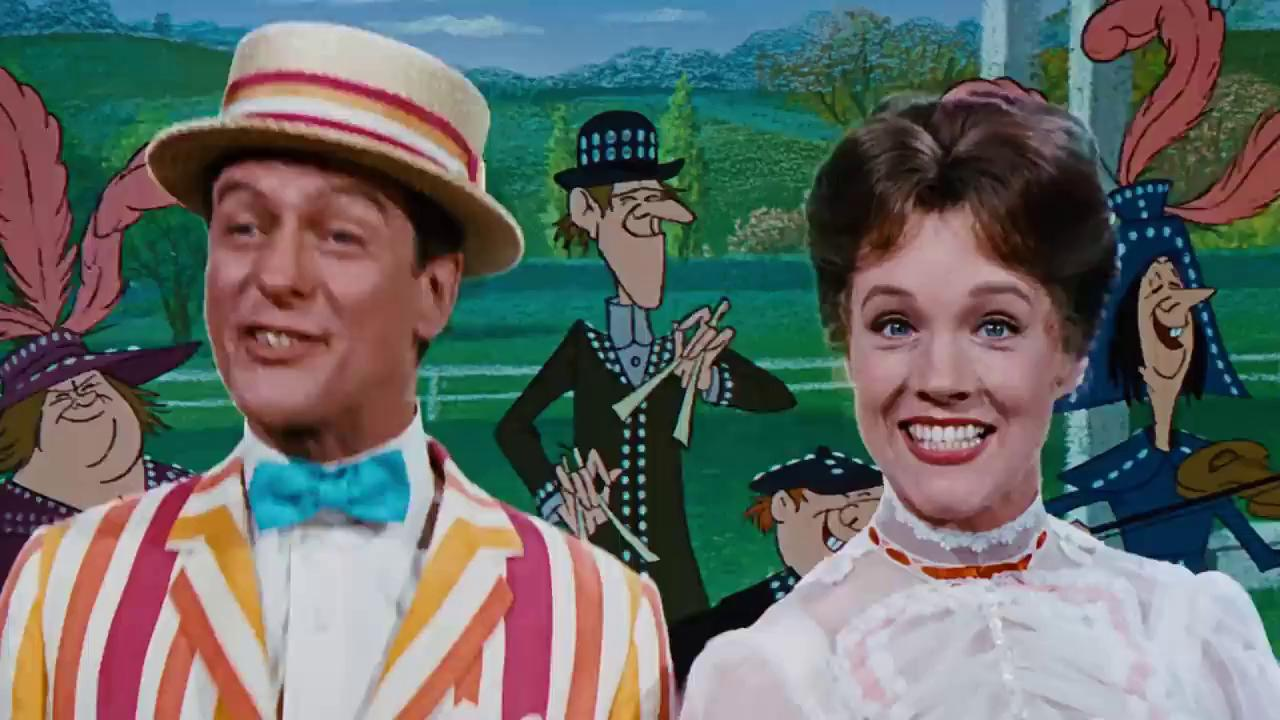

In [30]:
from IPython.display import Image
Image(imgs[0], width=360)

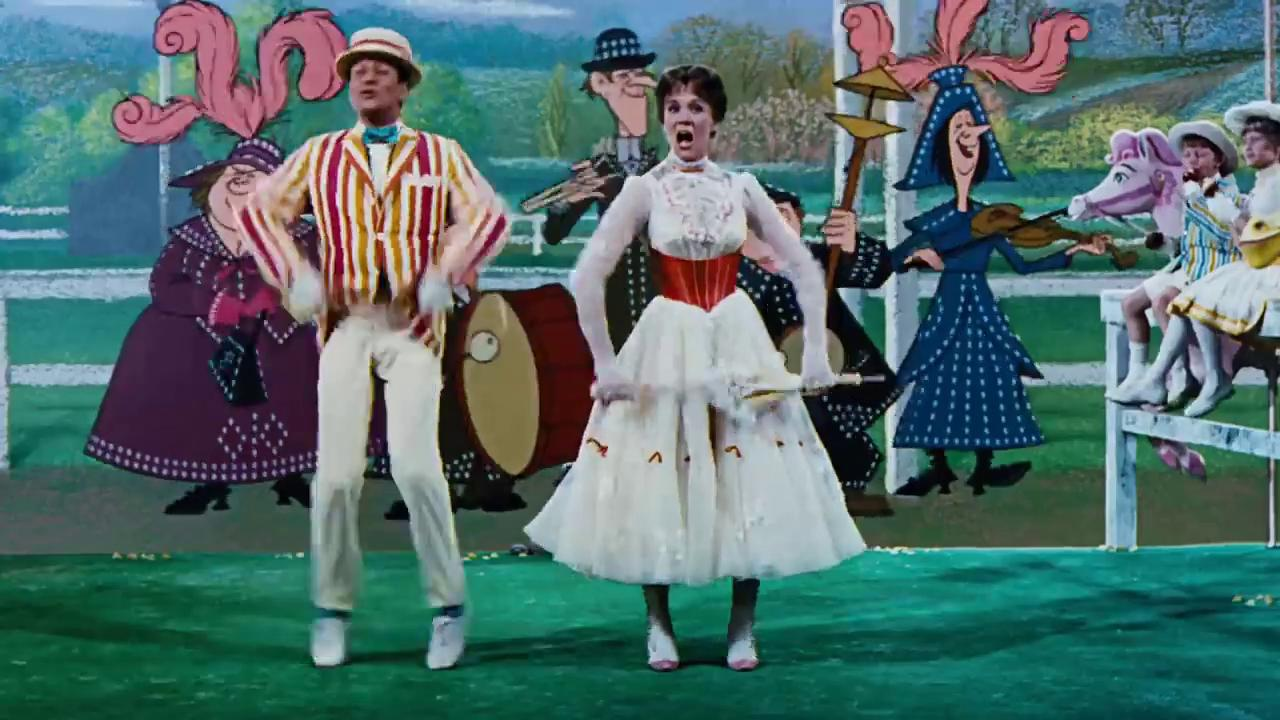

In [31]:
Image(imgs[10], width=360)

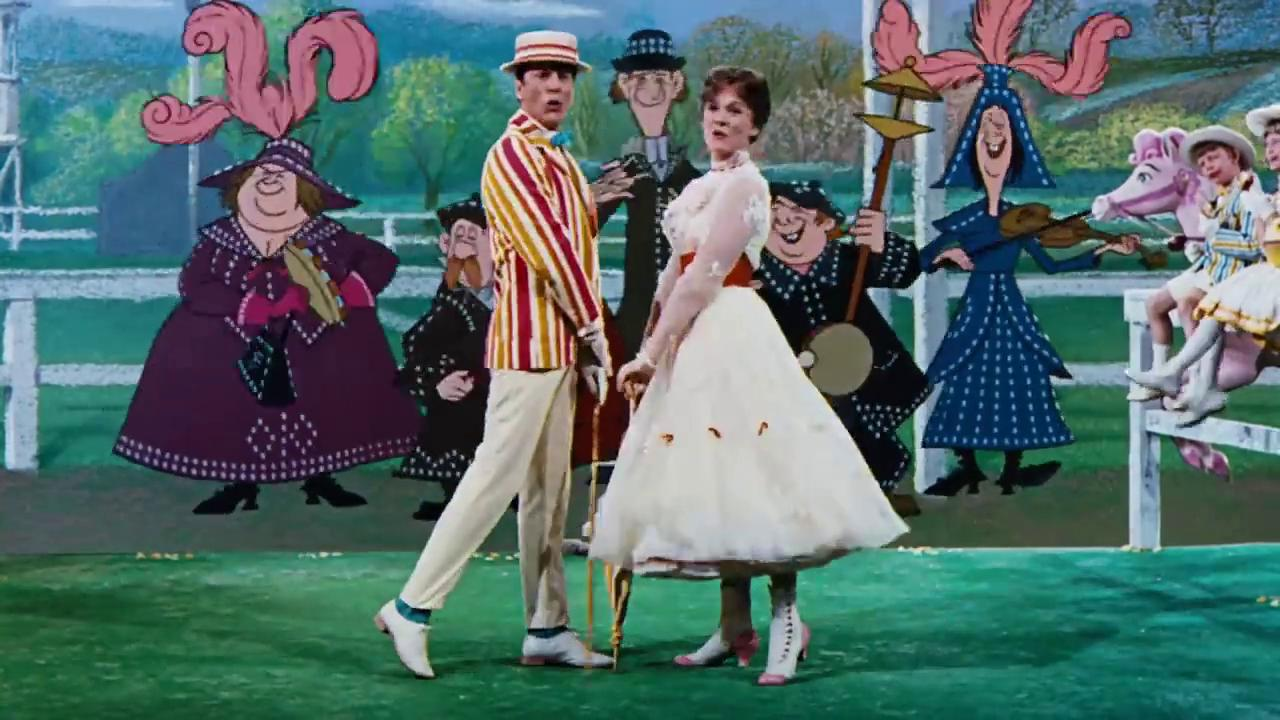

In [32]:
Image(imgs[-1], width=360)

## Extraire les personnages de l'image

On essaye différentes résolutions. On s'aperçoit que les personnages de dessin animé sont aussi considérés comme des personnes.

In [33]:
from code_beatrix.ai import DLImageSegmentation
model = DLImageSegmentation()

In [34]:
feat, pred = model.predict(imgs[0], resize=('max2', 400))

In [35]:
viz = model.plot(feat, pred)

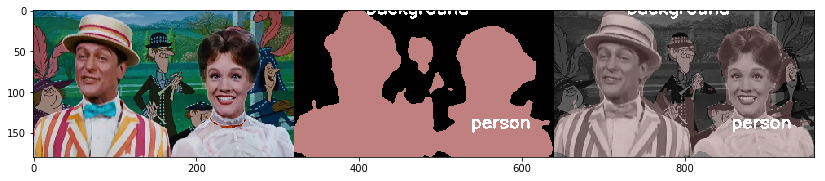

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
ax.imshow(viz)

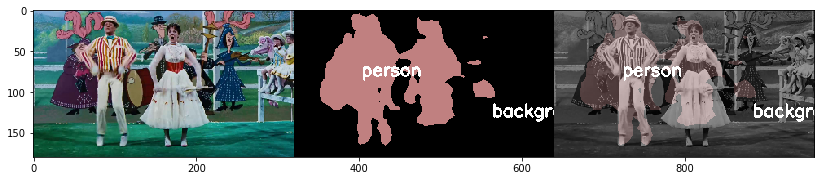

In [37]:
feat, pred = model.predict(imgs[10], resize=('max2', 400))
viz = model.plot(feat, pred)
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
ax.imshow(viz)

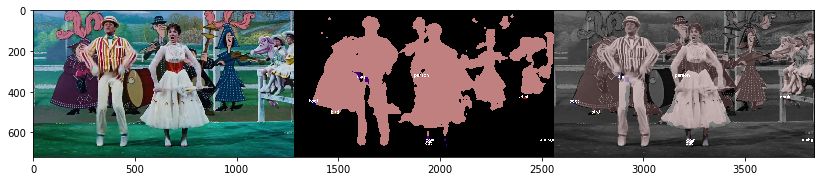

In [38]:
feat, pred = model.predict(imgs[10])
viz = model.plot(feat, pred)
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
ax.imshow(viz)

## Combiner les personnages avec une autre image

In [39]:
pred[pred!=0]

array([15, 15, 15, ...,  8,  8,  8])

In [40]:
feat.shape

(720, 1280, 3)

In [41]:
feat[pred!=15] = 0

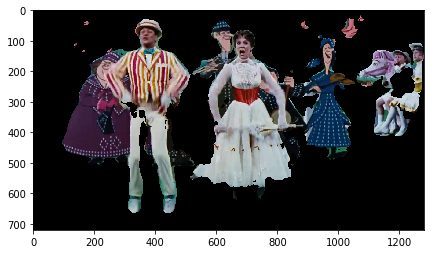

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.imshow(feat)

  warn("The default mode, 'constant', will be changed to 'reflect' in "

  .format(dtypeobj_in, dtypeobj_out))



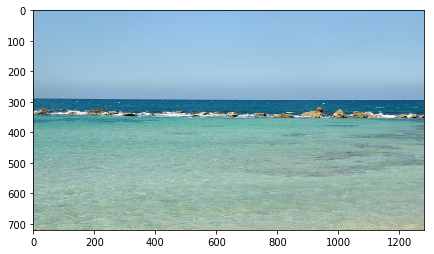

In [66]:
from skimage.io import imread
from skimage.transform import resize
from skimage import img_as_ubyte
img = imread("data/plage.jpg")
img = img_as_ubyte(resize(img, (720, 1280)))
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.imshow(img)

In [61]:
img.shape, feat.shape

((720, 1280, 3), (720, 1280, 3))

In [62]:
img[pred==15] = feat[pred==15]

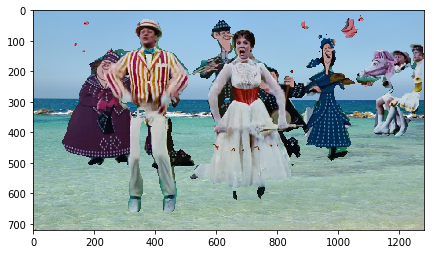

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.imshow(img)

## Mary Poppins danse sur l'eau